In [39]:
from collections import OrderedDict
import re
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
from tqdm.notebook import tqdm

from eval import get_run_metrics, read_run_dir, get_model_from_run
from plot_utils import basic_plot, collect_results, relevant_model_names

%matplotlib inline
%load_ext autoreload
%autoreload 2

sns.set_theme('notebook', 'darkgrid')
palette = sns.color_palette('colorblind')

run_dir = "../models/periodic"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
df = read_run_dir(run_dir)
df # list all the runs in our run_dir

,run_id,task,model,kwargs,num_tasks,num_examples,n_dims,n_layer,n_head,run_name
0,1468ab06-745f-43e9-9795-77053ef5cabf,fourier_sine_regression,Transformer,,-1,-1,20,12,8,fourier_sine_regression_standard
3,ef14b05a-d15a-4418-a47d-1ca6be3df829,linear_modulo_regression,Transformer,,-1,-1,20,12,8,linear_modulo_regression_standard
4,1643cdec-59ca-4f8e-ae37-1f9c73c31d8a,linear_sine_regression,Transformer,,-1,-1,20,12,8,linear_sine_regression_standard
1,b3d2bde5-95b7-4227-96b3-1cad688fec80,radial_sine_regression,Transformer,,-1,-1,20,12,8,radial_sine_regression_standard
6,8b1e67d2-cd30-4c7d-95fd-ce32a2e5e22e,saw_regression,Transformer,,-1,-1,20,12,8,saw_regression_standard
2,cb16b7e7-92c0-47fa-8a5b-40f9840f7e17,square_wave_regression,Transformer,,-1,-1,20,12,8,square_wave_regression_standard
5,9130cfcc-bc09-4887-ae64-2d0a869f8718,triangle_wave_regression,Transformer,,-1,-1,20,12,8,triangle_wave_regression_standard


In [44]:
# task = "linear_regression"
# task = "sparse_linear_regression"
# task = "decision_tree"
# task = "relu_2nn_regression"
task = "linear_modulo_regression"

run_id = df[df["task"] == task]["run_id"].iat[0]

run_path = os.path.join(run_dir, task, run_id)
recompute_metrics = True

if recompute_metrics:
    get_run_metrics(run_path, step=500_000)  # these are normally precomputed at the end of training

  0%|          | 0/1 [01:05<?, ?it/s]


KeyboardInterrupt: 

linear_modulo_regression_standard ef14b05a-d15a-4418-a47d-1ca6be3df829


100%|██████████| 1/1 [00:00<00:00, 4032.98it/s]


KeyError: 'Transformer'

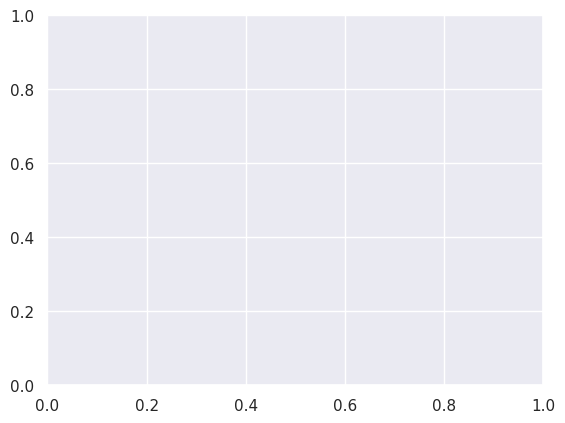

In [45]:
def valid_row(r):
    return r.task == task and r.run_id == run_id

metrics = collect_results(run_dir, df, valid_row=valid_row, step=500_000)
_, conf = get_model_from_run(run_path, only_conf=True)
n_dims = conf.model.n_dims

models = relevant_model_names[task]
basic_plot(metrics["standard"], models=models)
plt.show()